Enter weight in kg: 50
Enter height in meters: 4

BMI: 3.12
Category: Underweight

Show BMI graph? (yes/no): yes


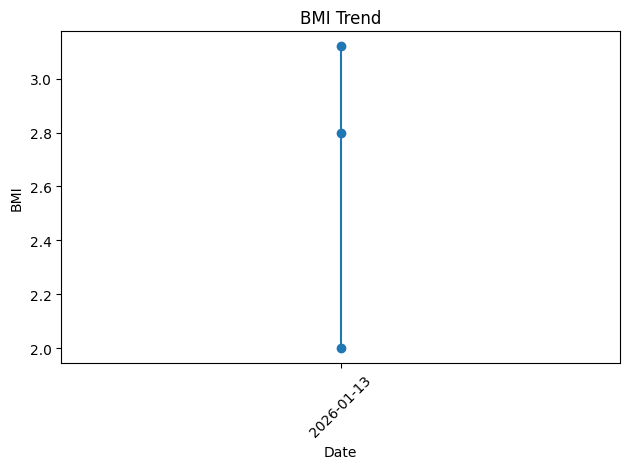

In [12]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt

# Calculate BMI
def calculate_bmi(weight, height):
    bmi = weight / (height ** 2)
    category = get_category(bmi)
    save_data(weight, height, bmi, category)
    return bmi, category

# BMI category
def get_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obese"

# Save data to CSV
def save_data(weight, height, bmi, category):
    with open("bmi_data.csv", "a", newline="") as file:
        writer = csv.writer(file)
        writer.writerow([
            datetime.now().strftime("%Y-%m-%d"),
            weight,
            height,
            round(bmi, 2),
            category
        ])

# Show BMI graph
def show_graph():
    dates = []
    bmis = []

    try:
        with open("bmi_data.csv", "r") as file:
            reader = csv.reader(file)
            for row in reader:
                dates.append(row[0])
                bmis.append(float(row[3]))

        plt.figure()
        plt.plot(dates, bmis, marker='o')
        plt.title("BMI Trend")
        plt.xlabel("Date")
        plt.ylabel("BMI")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    except FileNotFoundError:
        print("No BMI records found")

# -------- MAIN PROGRAM --------
try:
    weight = float(input("Enter weight in kg: "))
    height = float(input("Enter height in meters: "))

    if weight <= 0 or height <= 0:
        print("Enter positive numbers only")
    else:
        bmi, category = calculate_bmi(weight, height)
        print(f"\nBMI: {bmi:.2f}")
        print(f"Category: {category}")

        choice = input("\nShow BMI graph? (yes/no): ")
        if choice.lower() == "yes":
            show_graph()

except ValueError:
    print("Invalid input! Please enter numbers only.")